In [14]:
import numpy as np
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn import svm
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [15]:
def load_data(df, test_year):
    
    train = df.loc[df["year"] != test_year]
    test = df.loc[df["year"] == test_year]
    
    # 入力データの作成
    y_train = train['prize'].ravel()
    x_train = train.drop(['prize', 'year'], axis=1)
    
    features = x_train.columns
    
    x_train = x_train.values # 学習データ
    
    # テストデータの作成
    y_test = test['prize'].ravel()
    x_test = test.drop(['prize', 'year'], axis=1)
    x_test = x_test.values # テストデータ
    
    return x_train, x_test, y_train, y_test, features

In [16]:
def plot_roc_curve(fpr, tpr, auc):
    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

In [17]:
def create_models():
    lr = LogisticRegression(class_weight="balanced", solver="liblinear",  penalty="l2", C=0.0001)
    
    sv = svm.SVR(kernel="poly",
                                 degree=8,
                                 gamma=0.03521735642853326,
                                 coef0=0.34010389238140537,
                                 tol=1e-05,
                                 C=0.001,
                                 epsilon=0.14620884632948022,
                                verbose=True,
                max_iter=1000)

    xgboost = xgb.XGBRegressor(silent= True, 
                           max_depth=1,
                           learning_rate=0.14544434403253392,
                           n_estimators = 72,
                           gamma=0.4356018082020117,
                           reg_lambda=2.931451663505623,
                           reg_alpha=0.19045302677956732)

    lgbm = lgb.LGBMRegressor(
        verbosity=1,
        boost_from_average='true',
        metric='auc',
        bagging_freq=5,
        max_depth=19,
        learning_rate=0.09802221664336347,
        n_estimators=703,
        subsample=0.7596658467659505,
        reg_lambda=0.4087114877863393,  
    )
    
    lda = LDA(solver="eigen", shrinkage=1)

    estimators_rgs = [('sv', sv)]
    
    return estimators_rgs

In [18]:
def main():
    
    df =  pd.read_pickle('../../data/dataframes/std_scaled_df.pkl')
    
    cm_all = np.zeros((2, 2))
    
    # 予測した確率全体を格納
    probs_all = np.array([])
    y_true_all = np.array([])
    
    for y in range(1978, 2020):
        
        # データの生成
        x_train, x_test, y_train, y_test, features = load_data(df, y)
       
        # 学習
        estimators= create_models()
        
        vr = VotingRegressor(estimators)

        vr.fit(x_train, y_train)
        
        # 予測(確率)
        probs = vr.predict(x_test)
        probs_all = np.hstack((probs_all, probs))
        y_true_all = np.hstack((y_true_all, y_test))
        
        print(probs)

        # 混同行列
        y_pred = np.where((probs ==  max(probs)), 1, 0) #確率→0/1
        cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
        cm_all += cm

    auc = roc_auc_score(y_true_all, probs_all)
    fpr, tpr, thresholds = roc_curve(y_true_all, probs_all)
    
    plot_roc_curve(fpr, tpr, auc)
    
    print("len: {0} , {1}".format(len(y_true_all), len(probs_all) ))
    print("confusion_matrix: ")
    print(cm_all)
    print("AUC: ")
    print(auc)
    print()
    return

[LibSVM][0.14624121 0.14628206 0.14624145 0.14636967 0.14624147]
[LibSVM][0.14624594 0.14624694 0.14624701 0.14624704 0.14624707]
[LibSVM][0.14615754 0.14617405 0.14615828 0.14616071 0.14616056]
[LibSVM][0.14626118 0.14626053 0.14627042 0.14740225 0.14626285]
[LibSVM][0.14623215 0.14623335 0.14623177 0.14623226 0.14623238]
[LibSVM][0.14620859 0.14620674 0.14620884 0.14620867 0.14620814]
[LibSVM][0.14623452 0.14623452 0.14623318 0.14623493 0.14623276]
[LibSVM][0.14620894 0.14620859 0.14620678 0.14620827 0.1462085 ]
[LibSVM][0.14619149 0.14619269 0.14619023 0.14619271 0.14618972]
[LibSVM][0.14621248 0.14621122 0.14621209 0.14621269 0.14621295]
[LibSVM][0.14622683 0.14622681 0.14622643 0.14622556 0.1462262 ]
[LibSVM][0.14616231 0.14616525 0.14616427 0.14616171 0.14616307]
[LibSVM]

/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamo

[-0.14620892  0.14620867 -0.14620892  0.14620848  0.146208  ]
[LibSVM][0.14622834 0.14622839 0.14622815 0.14621848 0.14622837]
[LibSVM][0.14620956 0.1462092  0.14620943 0.14620931 0.14620905]
[LibSVM][0.14625225 0.1462521  0.14625164 0.14681118 0.14681118]
[LibSVM][0.14619983 0.14620188 0.14620144 0.14711743 0.14620027]
[LibSVM][0.14617109 0.14617088 0.14617087 0.14616871 0.14617017]
[LibSVM][0.14623744 0.14623752 0.14609351 0.14623638 0.14623737]
[LibSVM][0.14616998 0.14617202 0.14617125 0.14617385 0.14617297]
[LibSVM][0.14617955 0.14618198 0.14618152 0.14618256 0.14618287]
[LibSVM][0.14615844 0.1461607  0.14615874 0.14615935 0.14616191]
[LibSVM][0.14620999 0.14621025 0.14621    0.14620999 0.14620886]
[LibSVM][0.14625473 0.14625482 0.14625475 0.14625451 0.14625454]
[LibSVM]

/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamo

[0.14625082 0.14625158 0.14625077 0.14624867 0.14625052]
[LibSVM][0.14621087 0.14621083 0.14621031 0.14621057 0.14621069]
[LibSVM][0.14622199 0.14622226 0.14622186 0.14622397 0.14695467]
[LibSVM][0.14625647 0.14625614 0.14625607 0.14625508 0.14625442]
[LibSVM][0.14619748 0.14619824 0.14619768 0.1461998  0.14619842]
[LibSVM][0.14616435 0.14616406 0.14616238 0.14616281 0.1461642 ]
[LibSVM][0.14619309 0.14619498 0.14619628 0.14619357 0.14619532]
[LibSVM][0.146181   0.14618058 0.14618134 0.14617998 0.14618124]
[LibSVM][0.14624294 0.14624233 0.14624221 0.14624221 0.14624225]
[LibSVM][0.14616424 0.14616099 0.14616254 0.14616253 0.14616095]
[LibSVM][0.14624181 0.14624418 0.14624333 0.14624183 0.14624398]
[LibSVM][0.1462127  0.14621282 0.14621289 0.14621101 0.14621306]
[LibSVM][0.14619798 0.14619879 0.1461998  0.14620007 0.14619954 0.14619965]


/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/nakamo

[LibSVM][0.14620568 0.14620784 0.14620681 0.14620769 0.14620771]
[LibSVM][0.14621414 0.14621365 0.14621389 0.14621312 0.14621387]
[LibSVM][0.14620889 0.14620689 0.14620848 0.14620889 0.1462089 ]
[LibSVM][0.1462358  0.14623558 0.1462356  0.1462357  0.14623446]
[LibSVM][0.14620824 0.14620813 0.14620819 0.1462082  0.14620816]


/home/nakamoto/venv/lib64/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


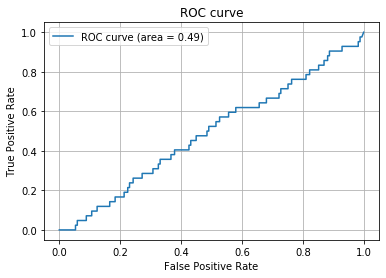

len: 211 , 211
confusion_matrix: 
[[138.  31.]
 [ 30.  12.]]
AUC: 
0.4890814313891237



In [13]:
main()